##  Setting up: Install required packages

In [4]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
import seaborn as sns

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
from sklearn.model_selection import KFold, cross_val_score

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.metrics import f1_score

In [13]:
from sklearn.svm import SVC

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
from sklearn import metrics

##  Exercise 9.5

In [54]:
# Random Uniform Distribution
x1= np.random.uniform(-1,0,500)-0.5
x2 = np.random.uniform(-1,0,500)-0.5
y=1*(x1**2-x2**2 > 0)

In [55]:
df_u = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

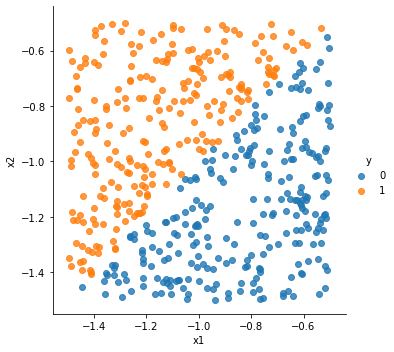

In [56]:
sns.lmplot( x="x1", y="x2", data=df_u, fit_reg=False, hue='y', legend=True)

In [59]:
mms = MinMaxScaler()
cols = df_u.keys()

In [62]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [63]:
X=df_u.iloc[:,0:2]
y=df_u.loc[:,"y"]
y.head()


0    1
1    1
2    0
3    0
4    0
Name: y, dtype: int32

In [82]:
for trainIndex, textIndex in kf.split(X,y):
    I_a=[]
    I_f1=[]
    X_norm=pd.DataFrame(mms.fit_transform(X))
    X_train,X_test= X_norm.values[trainIndex], X_norm.values[testIndex]
    y_train, yTest = y[trainIndex], y[testIndex]
    logreg=LogisticRegression()
    logreg.fit(X_train, y_train)
    yPred = logreg.predict(X_train)
    yPred1 = logreg.predict(X_test)
    I_a.append(accuracy_score(yTest,yPred1))
    I_f1.append(f1_score(yTest,yPred1,average='micro'))
    
print(f'5-fold cross validation accuracy: {np.mean(I_a)}')
print(f'5-fold cross validation F1 score: {np.mean(I_f1)}')

5-fold cross validation accuracy: 0.88
5-fold cross validation F1 score: 0.88


In [ ]:
X_train=pd.DataFrame(X_train)
X_train['ypred']=yPred
X_train.columns = ['x1', 'x2','ypred']

In [ ]:
sns.lmplot( x="x1", y="x2", data=X_train, fit_reg=False, hue='ypred', legend=True,palette ='husl')

### Non linear Case

In [70]:
x11=x1**4
x22=x1*x2
y=y

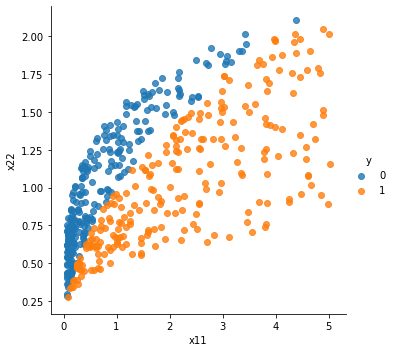

In [71]:
df1 = pd.DataFrame({'x11':x11, 'x22':x22, 'y':y})
sns.lmplot( x="x11", y="x22", data=df1, fit_reg=False, hue='y', legend=True)

In [72]:
mms = MinMaxScaler()
cols = df.keys()
X=df1.iloc[:,0:2]
y=df1.loc[:,"y"]
X.head()

x11       x22
0  1.597885  0.721156
1  1.813566  0.890339
2  0.902885  0.971976
3  0.133581  0.850416
4  2.534176  1.599565

In [79]:
for trainIndex, testIndex in kf.split(X,y):
    I_a=[]
    I_f1=[]
    X_norm=pd.DataFrame(mms.fit_transform(X))
    X_train,X_test= X_norm.values[trainIndex], X_norm.values[testIndex]
    y_train, yTest = y[trainIndex], y[textIndex]
    logreg=LogisticRegression()
    logreg.fit(X_train, y_train)
    yPred = logreg.predict(X_train)
    yPred1 = logreg.predict(X_test)
    I_a.append(accuracy_score(yTest,yPred1))
    I_f1.append(f1_score(yTest,yPred1,average='micro'))
    
print(f'5-fold cross validation accuracy: {np.mean(I_a)}')
print(f'5-fold cross validation F1 score: {np.mean(I_f1)}')

5-fold cross validation accuracy: 0.54
5-fold cross validation F1 score: 0.54


In [80]:
X_train=pd.DataFrame(X_train)
X_train['ypred']=yPred
X_train.columns = ['x11', 'x22','ypred']

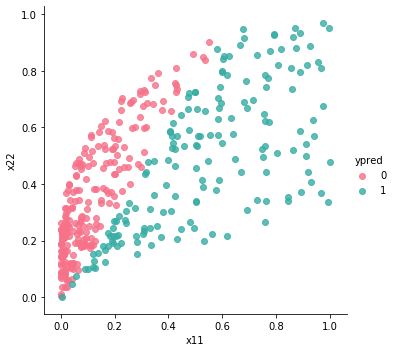

In [81]:
sns.lmplot( x="x11", y="x22", data=X_train, fit_reg=False, hue='ypred', legend=True,palette ='husl')

### Support Vector classifier x1 and x2

In [85]:
df2=df_u.copy()

In [86]:
mms = MinMaxScaler()
cols = df2.keys()
X=df2.iloc[:,0:2]
y=df2.loc[:,"y"]
X.head()

x1        x2
0 -1.124311 -0.641421
1 -1.160468 -0.767224
2 -0.974783 -0.997120
3 -0.604555 -1.406680
4 -1.261709 -1.267777

In [89]:
for trainIndex, testIndex in kf.split(X,y):
    I_a=[]
    I_f1=[]
    X_norm=pd.DataFrame(mms.fit_transform(X))
    X_train,X_test= X_norm.values[trainIndex], X_norm.values[testIndex]
    y_train, yTest = y[trainIndex], y[textIndex]
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    yPred = svclassifier.predict(X_train)
    yPred1 = svclassifier.predict(X_test)
    I_a.append(accuracy_score(yTest,yPred1))
    I_f1.append(f1_score(yTest,yPred1,average='micro'))
    
print(f'LDA 5-fold cross validation accuracy: {np.mean(I_a)}')
print(f'LDA 5-fold cross validation F1 score: {np.mean(I_f1)}')

LDA 5-fold cross validation accuracy: 0.99
LDA 5-fold cross validation F1 score: 0.99


In [90]:
X_train=pd.DataFrame(X_train)
X_train['ypred']=yPred
X_train.columns = ['x1', 'x2','ypred']

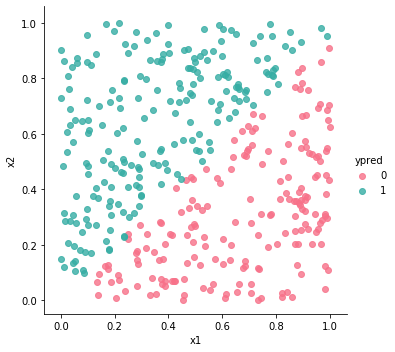

In [91]:
sns.lmplot( x="x1", y="x2", data=X_train, fit_reg=False, hue='ypred', legend=True,palette ='husl')

# Non linear Kernel

In [92]:
kernel='poly'

In [93]:
for trainIndex, testIndex in kf.split(X,y):
    I_a=[]
    I_f1=[]
    X_norm=pd.DataFrame(mms.fit_transform(X))
    X_train,X_test= X_norm.values[trainIndex], X_norm.values[testIndex]
    y_train, yTest = y[trainIndex], y[textIndex]
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    yPred = svclassifier.predict(X_train)
    yPred1 = svclassifier.predict(X_test)
    I_a.append(accuracy_score(yTest,yPred1))
    I_f1.append(f1_score(yTest,yPred1,average='micro'))
    
print(f'LDA 5-fold cross validation accuracy: {np.mean(I_a)}')
print(f'LDA 5-fold cross validation F1 score: {np.mean(I_f1)}')

LDA 5-fold cross validation accuracy: 0.99
LDA 5-fold cross validation F1 score: 0.99


In [94]:
X_train=pd.DataFrame(X_train)
X_train['ypred']=yPred
X_train.columns = ['x11', 'x22','ypred']

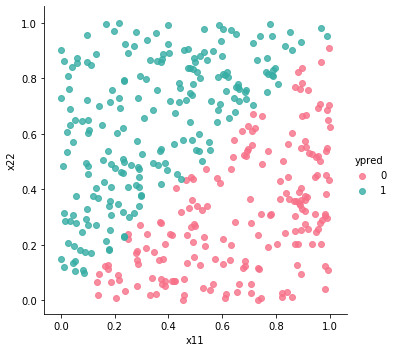

In [95]:
sns.lmplot( x="x11", y="x22", data=X_train, fit_reg=False, hue='ypred', legend=True,palette ='husl')

### Support Vector classifier x11 and x22

In [96]:
df3=df1.copy()

In [97]:
mms = MinMaxScaler()
cols = df3.keys()
X=df3.iloc[:,0:2]
y=df3.loc[:,"y"]
X.head()

x11       x22
0  1.597885  0.721156
1  1.813566  0.890339
2  0.902885  0.971976
3  0.133581  0.850416
4  2.534176  1.599565

In [98]:
for trainIndex, testIndex in kf.split(X,y):
    I_a=[]
    I_f1=[]
    X_norm=pd.DataFrame(mms.fit_transform(X))
    X_train,X_test= X_norm.values[trainIndex], X_norm.values[testIndex]
    y_train, yTest = y[trainIndex], y[textIndex]
    svclassifier = SVC(kernel='rbf') #poly rbf sigmoid
    svclassifier.fit(X_train, y_train)
    yPred = svclassifier.predict(X_train)
    yPred1 = svclassifier.predict(X_test)
    I_a.append(accuracy_score(yTest,yPred1))
    I_f1.append(f1_score(yTest,yPred1,average='micro'))
    
print(f'5-fold cross validation accuracy: {np.mean(I_a)}')
print(f'5-fold cross validation F1 score: {np.mean(I_f1)}')

5-fold cross validation accuracy: 0.95
5-fold cross validation F1 score: 0.9500000000000001


In [99]:
X_train=pd.DataFrame(X_train)
X_train['ypred']=yPred
X_train.columns = ['x11', 'x22','ypred']

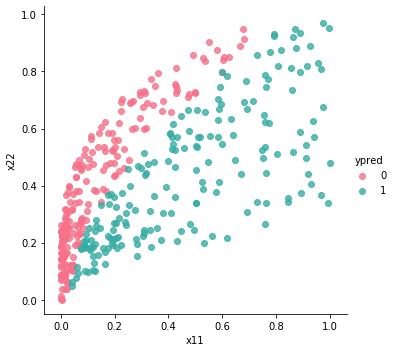

In [100]:
sns.lmplot( x="x11", y="x22", data=X_train, fit_reg=False, hue='ypred', legend=True,palette ='husl')

##  Exercise 9.7

## Data pre-processing

In [4]:
df=pd.read_csv('https://gist.githubusercontent.com/JishanBSU2018/7c771e4a43f7a17ff7b3eeabc76781e6/raw/c004d096a61291f2b73b23d4e9f76c33b0af454f/Auto.csv',sep='\t')

In [5]:
df.sample(4)

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
375  37.0          4          91.0         68    2025          18.2    82   
4    17.0          8         302.0        140    3449          10.5    70   
168  23.0          4         140.0         83    2639          17.0    75   
8    14.0          8         455.0        225    4425          10.0    70   

     origin                name  
375       3  mazda glc custom l  
4         1         ford torino  
168       1          ford pinto  
8         1    pontiac catalina

In [6]:
df.describe().transpose()

count         mean         std     min     25%     50%     75%  \
mpg           397.0    23.515869    7.825804     9.0    17.5    23.0    29.0   
cylinders     397.0     5.458438    1.701577     3.0     4.0     4.0     8.0   
displacement  397.0   193.532746  104.379583    68.0   104.0   146.0   262.0   
weight        397.0  2970.261965  847.904119  1613.0  2223.0  2800.0  3609.0   
acceleration  397.0    15.555668    2.749995     8.0    13.8    15.5    17.1   
year          397.0    75.994962    3.690005    70.0    73.0    76.0    79.0   
origin        397.0     1.574307    0.802549     1.0     1.0     1.0     2.0   

                 max  
mpg             46.6  
cylinders        8.0  
displacement   455.0  
weight        5140.0  
acceleration    24.8  
year            82.0  
origin           3.0

In [7]:
df.shape

(397, 9)

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [9]:
df["horsepower"] = df.horsepower.convert_objects(convert_numeric=True)

C:\Users\Jishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [10]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [12]:
df1=df.drop(['name'], axis=1)

In [13]:
df1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [14]:
med_mpg=df['mpg'].median()
print (med_mpg)

23.0


 ### (a) Create a binary variable 

In [15]:
def convert_mpg_to_binary(x):
    if x > med_mpg:
        return 1
    else:
        return 0

df1["mpg_median"] = df1["mpg"].apply(convert_mpg_to_binary)


In [16]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [17]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [18]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [19]:
y = df1['mpg_median']
X = pd.get_dummies(df1[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']], drop_first=True)

In [20]:
y.sample(5)

163    0
82     0
8      0
17     0
219    1
Name: mpg_median, dtype: int64

In [21]:
X_new = X.fillna(X.mean())

In [22]:
X_new.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

###  (b) Fit a support vector classiﬁer with scaling and without scaling

In [24]:
#Best value for ccp_alpha (the pruning parameter)
ccp_a=[0.01, 0.1, 1, 5, 10, 100]
mse_a=[]
start_time = time.time()
for i in range(len(ccp_a)):
        clf_t = svm.SVC(kernel='linear',C=ccp_a[i])
        auc_error =cross_val_score(clf_t,X_new,y,scoring='roc_auc', cv=10)
        print(f'When the value of the cost is:{ccp_a[i]}')
        print(f'Support Vector 5-fold cross validation ROC-AUC score: {np.mean(auc_error)}\n')
        mse_a.append(np.mean(auc_error))
end_time = time.time()  
print ("Computational time without scaling  = " +str(end_time - start_time) )

When the value of the cost is:0.01
Support Vector 5-fold cross validation ROC-AUC score: 0.9992481203007518

When the value of the cost is:0.1
Support Vector 5-fold cross validation ROC-AUC score: 0.9994987468671679

When the value of the cost is:1
Support Vector 5-fold cross validation ROC-AUC score: 1.0

When the value of the cost is:5
Support Vector 5-fold cross validation ROC-AUC score: 1.0

When the value of the cost is:10
Support Vector 5-fold cross validation ROC-AUC score: 1.0

When the value of the cost is:100
Support Vector 5-fold cross validation ROC-AUC score: 1.0

Computational time without scaling = 24.159557580947876


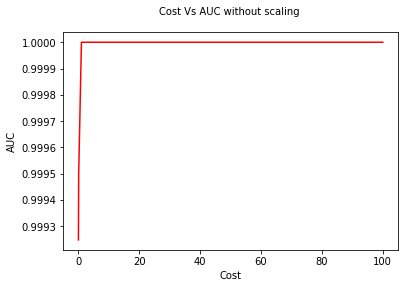

In [25]:
plt.title('Cost Vs AUC without scaling \n',fontsize=10)
plt.plot(ccp_a, mse_a,'r-')
plt.xlabel("Cost")
plt.ylabel("AUC")
plt.savefig('Cost_AUC.jpg')


In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_new)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
xScaled = scaler.transform(X_new)
#xScaled

In [26]:
XScaledDF = pd.DataFrame(xScaled, columns=X_new.columns)
XScaledDF.sample(10)

mpg  cylinders  displacement  horsepower    weight  acceleration  \
389  1.085491  -0.858191     -0.475143   -0.221716 -0.360474     -0.602822   
245  1.610060  -0.858191     -0.916398   -1.007073 -1.381924     -0.420774   
13  -1.217495   1.495535      2.508126    3.155319  0.136671     -2.022795   
252 -0.552188   0.318672      0.359405    0.013891  0.666880      1.326886   
179 -0.193946  -0.858191     -0.695771   -0.169359 -0.029831     -0.384364   
151  0.957547  -0.858191     -1.098656   -0.980895 -1.145750      0.161780   
386  1.853152   0.318672      0.656773   -0.509681  0.052830      0.525875   
129  0.957547  -0.858191     -1.098656   -0.980895 -1.204793      1.254067   
305  0.624893  -0.858191     -0.407996   -0.378788 -0.354569      0.161780   
231 -1.025579   1.495535      1.980538    2.239069  1.599765     -1.221785   

         year    origin  
389  1.629433  1.778696  
245  0.544056 -0.716507  
13  -1.626699 -0.716507  
252  0.544056 -0.716507  
179 -0.269977  0.531095  
151 -0.541322  0.531095  
386  1.629433 -0.716507  
129 -0.541322  1.778696  
305  0.815400 -0.716507  
231  0.272711 -0.716507

In [30]:
#Best value for ccp_alpha (the pruning parameter)
ccp_s=[0.01, 0.1, 1, 5, 10, 100]
mse_s=[]
start_time_s = time.time()
for i in range(len(ccp_s)):
        clf_s = svm.SVC(kernel='linear',C=ccp_a[i])
        auc_error_s =cross_val_score(clf_s,XScaledDF,y,scoring='roc_auc', cv=10)
        print(f'When the value of the cost is:{ccp_a[i]}')
        print(f'Support Vector 5-fold cross validation ROC-AUC score: {np.mean(auc_error_s)}\n')
        mse_s.append(np.mean(auc_error_s))
end_time_s = time.time()  
print ("Computational time with scaling = " +str(end_time_s - start_time_s) )

When the value of the cost is:0.01
Support Vector 5-fold cross validation ROC-AUC score: 0.9843740601503759

When the value of the cost is:0.1
Support Vector 5-fold cross validation ROC-AUC score: 0.9961904761904762

When the value of the cost is:1
Support Vector 5-fold cross validation ROC-AUC score: 0.9989974937343359

When the value of the cost is:5
Support Vector 5-fold cross validation ROC-AUC score: 0.9994987468671679

When the value of the cost is:10
Support Vector 5-fold cross validation ROC-AUC score: 0.9992481203007518

When the value of the cost is:100
Support Vector 5-fold cross validation ROC-AUC score: 1.0

Computational time with scaling = 0.5199978351593018


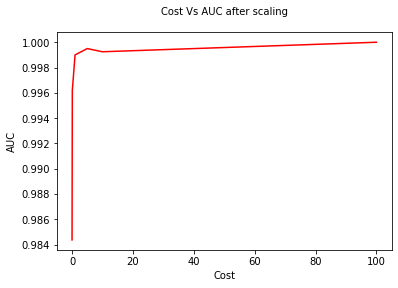

In [31]:
plt.title('Cost Vs AUC after scaling\n',fontsize=10)
plt.plot(ccp_s, mse_s,'r-')
plt.xlabel("Cost")
plt.ylabel("AUC")
plt.savefig('Cost_AUC_scale.jpg')

### (c) Hyperparameters tuning using GridSearchCV for SVMs with radial and polynomial basis kernels

In [32]:
gs = svm.SVC()
parameter_space =[{'kernel':['rbf'],'gamma':[0.01, 0.1, 1],'C' :[0.1,1,10,100]}, 
                  {'kernel':['poly'], 'gamma':[0.01, 0.1, 1],'C' :[0.1, 1,10,100],'degree':[2, 3]}]
                    
clf_gs = GridSearchCV(gs, parameter_space,cv=3,n_jobs=-1)
start_time_gs = time.time()
clf_gs.fit(XScaledDF, y)
end_time_gs = time.time()  
print ("Computational time of the training with scaling = " +str(end_time_gs - start_time_gs) )
print("Best Score: {}".format(clf_gs.best_score_))
print("Best params: {}".format(clf_gs.best_params_))


Computational time of the training with scaling = 1.1729965209960938
Best Score: 0.9296536796536797
Best params: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [27]:
gs = svm.SVC()
parameter_space ={'kernel':['rbf'],'gamma':[0.01, 0.1, 1],'C' :[1,5,10]}                                  
clf_gs = GridSearchCV(gs, parameter_space,cv=3,n_jobs=-1)
start_time_gs = time.time()
clf_gs.fit(XScaledDF, y)
end_time_gs = time.time()  
print ("Computational time of the training with scaling = " +str(end_time_gs - start_time_gs) )
print("Best Score: {}".format(clf_gs.best_score_))
print("Best params: {}".format(clf_gs.best_params_))

Computational time of the training with scaling = 3.760681629180908
Best Score: 0.8894395078605605
Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [31]:
gs = svm.SVC()
parameter_space ={'kernel':['poly'], 'gamma':[0.01, 0.1, 1],'C' :[1, 5,10],'degree':[2, 3]}                              
clf_gs = GridSearchCV(gs, parameter_space,cv=3,n_jobs=-1)
start_time_gs = time.time()
clf_gs.fit(XScaledDF, y)
end_time_gs = time.time()  
print ("Computational time of the training with scaling = " +str(end_time_gs - start_time_gs) )
print("Best Score: {}".format(clf_gs.best_score_))
print("Best params: {}".format(clf_gs.best_params_))

Computational time of the training with scaling = 0.344998836517334
Best Score: 0.9171413381939697
Best params: {'C': 5, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


In [76]:
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'mpg_median'],
      dtype='object')

### (d) Plot the ﬁrst and fourth variables

In [78]:
X=df1.iloc[:,0:2]
y=df1.loc[:,"mpg_median"]
svm_p = svm.SVC(C=1, kernel='linear')
svm_p.fit(X,y)
yPred = svm_p.predict(X)
X_train=pd.DataFrame(X)
X_train['ypred']=yPred
X_train.columns = ['x11', 'x22','ypred']

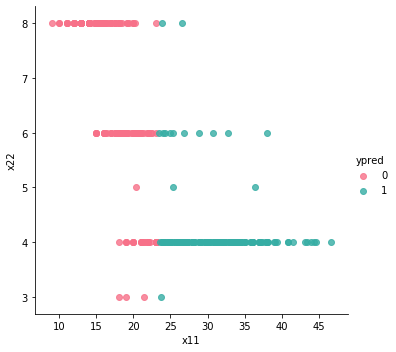

In [81]:
sns.lmplot( x="x11", y="x22", data=X_train, fit_reg=False, hue='ypred', legend=True,palette ='husl')

In [63]:
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'mpg_median'],
      dtype='object')

In [45]:
z_new = df1.fillna(df1.mean())
z_t=np.array(z_new[['mpg','horsepower']])

In [50]:
scaler_p = StandardScaler()
scaler_p.fit(z_new)
zScaled = scaler_p.transform(z_new)
ZScaledDF = pd.DataFrame(zScaled, columns=z_new.columns)
ZScaledDF.sample(10)

mpg  cylinders  displacement  horsepower    weight  acceleration  \
323  0.560922  -0.858191     -0.360033    0.013891 -0.201057     -0.420774   
325  2.659197  -0.858191     -0.993139   -1.478288 -1.045376      2.237126   
69  -1.473382   1.495535      1.500913    1.453712  1.754459     -0.748460   
197  0.701660  -0.858191     -0.993139   -0.902359 -1.220145     -0.493593   
321  1.111079  -0.858191     -0.820473   -0.771466 -0.832820     -0.129497   
35  -0.833664   0.318672      0.541663   -0.117002  0.423622     -0.020268   
152 -0.577777   0.318672      0.301850   -0.247895  0.346865      0.161780   
359  0.586510  -0.858191     -0.503921   -0.640574  0.306716      1.763801   
383  1.085491  -0.858191     -0.983546   -0.980895 -1.187080      0.052551   
135 -0.705720   0.318672      0.301850    0.013891  0.758988      0.343828   

         year    origin  mpg_median  
323  1.086744 -0.716507    1.038525  
325  1.086744  0.531095    1.038525  
69  -1.084010 -0.716507   -0.962904  
197  0.001367  0.531095    1.038525  
321  1.086744  1.778696    1.038525  
35  -1.355355 -0.716507   -0.962904  
152 -0.269977 -0.716507   -0.962904  
359  1.358089  0.531095    1.038525  
383  1.629433  1.778696    1.038525  
135 -0.541322 -0.716507   -0.962904

In [51]:
z_f=np.array(ZScaledDF[['mpg','horsepower']])

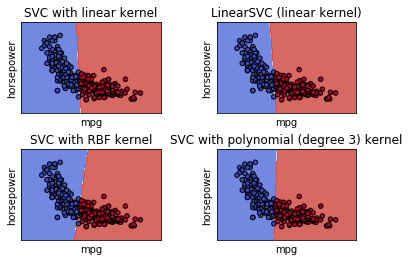

In [53]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Create a new X , and y using two predictors
X=z_f
y=np.array(df1.loc[:,"mpg_median"])
# we create SVM models using optimal parameters from problem (b), and (c) and fit our scaled data
models = (svm.SVC(kernel='linear', C=100),
          svm.LinearSVC(C=5, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.01, C=10),
          svm.SVC(kernel='poly', degree=3, gamma=1, C=5))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('mpg')
    ax.set_ylabel('horsepower')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Exercise 9.8

In [16]:
df = pd.read_csv("https://gist.githubusercontent.com/krrik/e0a5518b6802442493919b5ed4009e1f/raw/5e87425f86120ef726b559cce8425d3d5cdf88ee/oj.csv")
df.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

In [17]:
df.describe()

WeekofPurchase      StoreID      PriceCH      PriceMM       DiscCH  \
count     1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean       254.381308     3.959813     1.867421     2.085411     0.051860   
std         15.558286     2.308984     0.101970     0.134386     0.117474   
min        227.000000     1.000000     1.690000     1.690000     0.000000   
25%        240.000000     2.000000     1.790000     1.990000     0.000000   
50%        257.000000     3.000000     1.860000     2.090000     0.000000   
75%        268.000000     7.000000     1.990000     2.180000     0.000000   
max        278.000000     7.000000     2.090000     2.290000     0.500000   

            DiscMM    SpecialCH    SpecialMM      LoyalCH  SalePriceMM  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.123364     0.147664     0.161682     0.565782     1.962047   
std       0.213834     0.354932     0.368331     0.307843     0.252697   
min       0.000000     0.000000     0.000000     0.000011     1.190000   
25%       0.000000     0.000000     0.000000     0.325257     1.690000   
50%       0.000000     0.000000     0.000000     0.600000     2.090000   
75%       0.230000     0.000000     0.000000     0.850873     2.130000   
max       0.800000     1.000000     1.000000     0.999947     2.290000   

       SalePriceCH    PriceDiff    PctDiscMM    PctDiscCH  ListPriceDiff  \
count  1070.000000  1070.000000  1070.000000  1070.000000    1070.000000   
mean      1.815561     0.146486     0.059298     0.027314       0.217991   
std       0.143384     0.271563     0.101760     0.062232       0.107535   
min       1.390000    -0.670000     0.000000     0.000000       0.000000   
25%       1.750000     0.000000     0.000000     0.000000       0.140000   
50%       1.860000     0.230000     0.000000     0.000000       0.240000   
75%       1.890000     0.320000     0.112676     0.000000       0.300000   
max       2.090000     0.640000     0.402010     0.252688       0.440000   

             STORE  
count  1070.000000  
mean      1.630841  
std       1.430387  
min       0.000000  
25%       0.000000  
50%       2.000000  
75%       3.000000  
max       4.000000

In [18]:
X = df.drop(['Purchase', 'Store7'], axis=1)
y = df['Purchase']

In [19]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=800)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 0.94004747  1.3172933  -0.07280621 ...  1.89454789  0.48387455
  -1.14067272]
 [ 1.26156991  1.3172933  -0.07280621 ...  3.62318562  0.48387455
  -1.14067272]
 [ 0.23269811 -0.84917432 -0.07280621 ... -0.4391058   0.94905493
   0.25820385]
 ...
 [-0.7318692  -1.28246784 -0.07280621 ... -0.4391058  -0.81863052
  -0.44123443]
 [ 0.8114385   0.01741273  1.20267782 ...  0.36874501 -1.09773875
   1.65708043]
 [ 0.61852503  0.01741273  1.20267782 ...  0.36874501 -1.09773875
   1.65708043]]
[[-0.53895574 -0.84917432  0.22153626 ... -0.4391058  -0.16737799
   0.25820385]
 [-1.63213203 -0.41588079 -0.75960529 ... -0.4391058  -2.02809951
   0.95764214]
 [-1.56782754  1.3172933  -1.74074685 ... -0.4391058   0.76298277
  -1.14067272]
 ...
 [-0.02451984  1.3172933  -0.07280621 ... -0.4391058   0.94905493
  -1.14067272]
 [ 0.10408913 -0.84917432  0.22153626 ...  0.66667124  0.6699467
   0.25820385]
 [ 1.00435196 -1.28246784 -0.07280621 ... -0.4391058   0.94905493
  -0.44123443]]
985    CH
631    

(b) Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and the other variables
as predictors. And show equivalent summary statistics, and describe the results obtained.
(c) What are the training and test error rates?

In [21]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

for itrain, itest in kf.split(X_train, y_train):
    X_train, X_test = X.iloc[itrain].values, X.iloc[itest].values
    y_train, y_test = y.iloc[itrain].values, y.iloc[itest].values
    sv_classifier = SVC(kernel = 'linear', C = 0.01)
    sv_classifier = sv_classifier.fit(X_train, y_train)
    
    print(sv_classifier.get_params)
    print("Training error rate", (1 - sv_classifier.score(X_train, y_train))*100)
    y_pred = sv_classifier.predict(X_test)
    print("Test error rate", (1- metrics.accuracy_score(y_test, y_pred))*100)
    print("Confusion matrix", confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred, zero_division = 1))

<bound method BaseEstimator.get_params of SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>
Training error rate 30.625000000000004
Test error rate 31.874999999999996
Confusion matrix [[97  2]
 [49 12]]
              precision    recall  f1-score   support

          CH       0.66      0.98      0.79        99
          MM       0.86      0.20      0.32        61

    accuracy                           0.68       160
   macro avg       0.76      0.59      0.56       160
weighted avg       0.74      0.68      0.61       160

<bound method BaseEstimator.get_params of SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,


(d) Use the equivalent tune() function to select an optimal cost. Consider values in the range 0.01 to 10
(e) Compute the training and test error rates using this new value for cost

In [22]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 10],  
              'kernel': ['linear']}

kf = KFold(n_splits=7)

grid = GridSearchCV(SVC(), param_grid, refit = True, cv=kf) 
  
grid_result = grid.fit(X_train, y_train) 

In [23]:
grid_result.cv_results_

{'mean_fit_time': array([0.01426356, 0.02171411, 0.03323088, 0.05683255, 0.11046355,
        0.21079898, 0.31344587]),
 'std_fit_time': array([0.00133005, 0.00215503, 0.00507427, 0.00706916, 0.02390037,
        0.09548618, 0.0832734 ]),
 'mean_score_time': array([0.00114128, 0.00171294, 0.00215592, 0.00150323, 0.        ,
        0.00171259, 0.00175878]),
 'std_score_time': array([0.00180452, 0.00197793, 0.00204563, 0.00160109, 0.        ,
        0.00197753, 0.00203245]),
 'param_C': masked_array(data=[0.01, 0.1, 0.5, 1, 2, 5, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'linear', 'linear',
                    'linear', 'linear'],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'kernel': 'linear'},
  {'C': 0.1, 'kernel': 'linear'},
  {'C': 0.5

In [24]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 0.5, 'kernel': 'linear'}
SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [25]:
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

          CH       0.89      0.94      0.92       107
          MM       0.87      0.77      0.82        53

    accuracy                           0.89       160
   macro avg       0.88      0.86      0.87       160
weighted avg       0.89      0.89      0.89       160



(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma

In [26]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

for itrain, itest in kf.split(X_train, y_train):
    X_train, X_test = X.iloc[itrain].values, X.iloc[itest].values
    y_train, y_test = y.iloc[itrain].values, y.iloc[itest].values
    sv_classifier = SVC(kernel = 'rbf', C = 0.01)
    sv_classifier = sv_classifier.fit(X_train, y_train)
    
    print(sv_classifier.score(X_train, y_train))
    
    y_pred = sv_classifier.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred, zero_division = 1))

0.689453125
[[82  0]
 [46  0]]
              precision    recall  f1-score   support

          CH       0.64      1.00      0.78        82
          MM       1.00      0.00      0.00        46

    accuracy                           0.64       128
   macro avg       0.82      0.50      0.39       128
weighted avg       0.77      0.64      0.50       128

0.68359375
[[85  0]
 [43  0]]
              precision    recall  f1-score   support

          CH       0.66      1.00      0.80        85
          MM       1.00      0.00      0.00        43

    accuracy                           0.66       128
   macro avg       0.83      0.50      0.40       128
weighted avg       0.78      0.66      0.53       128

0.66796875
[[93  0]
 [35  0]]
              precision    recall  f1-score   support

          CH       0.73      1.00      0.84        93
          MM       1.00      0.00      0.00        35

    accuracy                           0.73       128
   macro avg       0.86      0.50    

In [27]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 10],  
              'gamma': ['scale'], 
              'kernel': ['rbf']}

kf = KFold(n_splits=7)
grid = GridSearchCV(SVC(), param_grid, refit = True, cv = kf) 
  
# fitting the model for grid search 
grid_result = grid.fit(X_train, y_train) 

In [28]:
grid_result.cv_results_

{'mean_fit_time': array([0.01039403, 0.00998855, 0.01118949, 0.01166514, 0.01266265,
        0.01312535, 0.01371057]),
 'std_fit_time': array([0.00184153, 0.00222628, 0.00171403, 0.00226003, 0.00107631,
        0.00180469, 0.00153035]),
 'mean_score_time': array([0.00164049, 0.00287444, 0.00222857, 0.00236229, 0.0005706 ,
        0.00114124, 0.00154706]),
 'std_score_time': array([0.00176938, 0.0013533 , 0.00154708, 0.00192519, 0.00139769,
        0.00180446, 0.00182163]),
 'param_C': masked_array(data=[0.01, 0.1, 0.5, 1, 2, 5, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['scale', 'scale', 'scale', 'scale', 'scale', 'scale',
                    'scale'],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf'],
            

In [29]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [30]:
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions, zero_division = 1)) 

              precision    recall  f1-score   support

          CH       0.71      1.00      0.83        91
          MM       1.00      0.00      0.00        37

    accuracy                           0.71       128
   macro avg       0.86      0.50      0.42       128
weighted avg       0.79      0.71      0.59       128



(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2.

In [31]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

for itrain, itest in kf.split(X_train, y_train):
    X_train, X_test = X.iloc[itrain].values, X.iloc[itest].values
    y_train, y_test = y.iloc[itrain].values, y.iloc[itest].values
    sv_classifier = SVC(kernel = 'poly', C = 0.01, degree = 2)
    sv_classifier = sv_classifier.fit(X_train, y_train)
    
    print(sv_classifier.score(X_train, y_train))
    
    y_pred = sv_classifier.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred, zero_division = 1))

0.6772616136919315
[[64  0]
 [39  0]]
              precision    recall  f1-score   support

          CH       0.62      1.00      0.77        64
          MM       1.00      0.00      0.00        39

    accuracy                           0.62       103
   macro avg       0.81      0.50      0.38       103
weighted avg       0.76      0.62      0.48       103

0.6503667481662592
[[75  0]
 [28  0]]
              precision    recall  f1-score   support

          CH       0.73      1.00      0.84        75
          MM       1.00      0.00      0.00        28

    accuracy                           0.73       103
   macro avg       0.86      0.50      0.42       103
weighted avg       0.80      0.73      0.61       103

0.6829268292682927
[[61  0]
 [41  0]]
              precision    recall  f1-score   support

          CH       0.60      1.00      0.75        61
          MM       1.00      0.00      0.00        41

    accuracy                           0.60       102
   macro avg  

In [32]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 10],  
              'gamma': ['scale'], 
              'kernel': ['poly'],
             'degree': [2, 3]}  
kf = KFold(n_splits=5)
grid = GridSearchCV(SVC(), param_grid, refit = True, cv = kf) 
  
# fitting the model for grid search 
grid_result = grid.fit(X_train, y_train) 

In [33]:
grid_result.cv_results_

{'mean_fit_time': array([0.00222325, 0.00437078, 0.00424972, 0.00463705, 0.00295072,
        0.00594406, 0.0050334 , 0.00399451, 0.00399456, 0.00752077,
        0.00604773, 0.00886774, 0.00850339, 0.00950294]),
 'std_fit_time': array([1.81759843e-03, 1.99918070e-03, 4.56559032e-04, 1.70311795e-03,
        1.59073604e-03, 1.67382714e-03, 1.53201871e-03, 1.57717089e-06,
        1.25798282e-06, 1.82521368e-03, 1.12725237e-03, 1.31228545e-03,
        1.79815812e-03, 2.61928047e-03]),
 'mean_score_time': array([0.00263224, 0.00061398, 0.00159783, 0.00079861, 0.00375042,
        0.00106916, 0.00160785, 0.00399461, 0.00159802, 0.00079961,
        0.00283575, 0.00209103, 0.00103641, 0.00043225]),
 'std_score_time': array([1.26020966e-03, 8.17092248e-04, 1.95693858e-03, 1.59721375e-03,
        8.22341640e-04, 9.79167272e-04, 1.96927185e-03, 2.03760725e-06,
        1.95717222e-03, 1.59921646e-03, 1.96093318e-03, 1.56562372e-03,
        6.62248743e-04, 5.30423761e-04]),
 'param_C': masked_array(d

In [34]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [35]:
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions, zero_division = 1)) 

              precision    recall  f1-score   support

          CH       0.65      1.00      0.79        66
          MM       1.00      0.00      0.00        36

    accuracy                           0.65       102
   macro avg       0.82      0.50      0.39       102
weighted avg       0.77      0.65      0.51       102

